# LECTURE 8: Decision Tree
Blood Transfusion Service Center<br>
Dataset: archive.ics.uci.edu/dataset/176/blood+transfusion+service+center

In [9]:
from ucimlrepo import fetch_ucirepo 
import numpy as np
import pandas as pd
  
# fetch dataset 
blood = fetch_ucirepo(id=176) 
  
# data (as pandas dataframes) 
X = blood.data.features 
y = blood.data.targets 
  
df = pd.DataFrame(blood.data.original, columns=blood.data.headers)
df

,Recency,Frequency,Monetary,Time,Donated_Blood
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


Classification Report:
              precision    recall  f1-score   support

           b       0.89      0.79      0.84        39
           g       0.89      0.94      0.91        67

    accuracy                           0.89       106
   macro avg       0.89      0.87      0.88       106
weighted avg       0.89      0.89      0.89       106



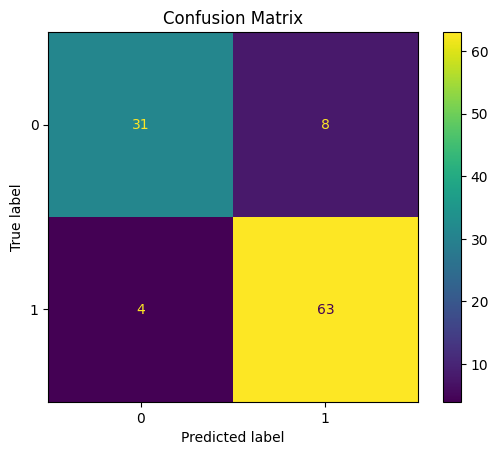

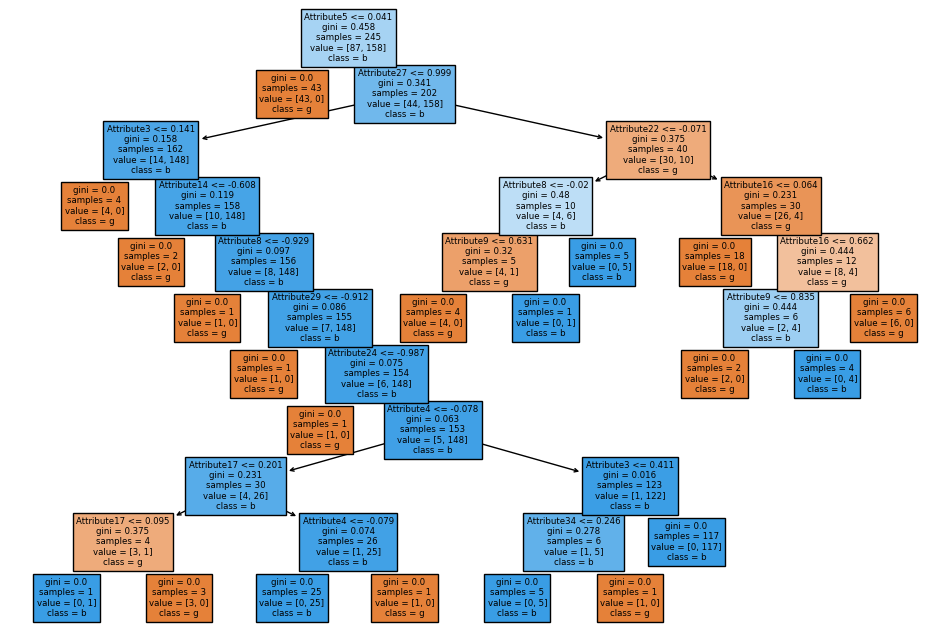

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Assume df is your dataset

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Class']), df['Class'], test_size=0.3, random_state=42)

# Step 2: Build a Decision Tree Model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Step 3: Evaluate the Model
y_pred = model.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.title("Confusion Matrix")
plt.show()

# Step 4: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, filled=True, feature_names=df.columns[:-1], class_names=df['Class'].unique())
plt.show()
